This implementation works on an analysed fixed version of the CSE-CIC-IDS 2018 Dataset. The goal is to create a model using machine learning techniques for later implementing a real-time intrusion detection system called Deep ReTiNa.
**(NOTE: in some cases, specially while importing the datasets, there might be duplicated code for RAM saving purposes, avoiding the execution stopping)**

The execution of the code will fail with the basic plan of Google Colab (only 12GB of RAM). This code has been executed with a Google Colab Pro plan with a RAM up to 51GB.
Before running the code make sure to download and import the *FTPBruteforce_attacks_balanced.csv* file from https://github.com/erikmurtaj/DeepReTiNA.

## 1. PRE-PROCESSING AND DATA BALANCING

In [ ]:
import os
import zipfile
import requests

# Define the URL of the dataset and the name of the zip file
url = "https://intrusion-detection.distrinet-research.be/CNS2022/Datasets/CSECICIDS2018_improved.zip"
zip_file_name = "CSECICIDS2018_improved.zip"

# Download the dataset using requests
response = requests.get(url)

# Save the downloaded zip file
with open(zip_file_name, "wb") as f:
    f.write(response.content)

# Unzip the downloaded file
with zipfile.ZipFile(zip_file_name, "r") as zip_ref:
    zip_ref.extractall()

# Remove the zip file after extraction (optional)
os.remove(zip_file_name)


In [ ]:
import pandas as pd
from sklearn.utils import resample
import numpy as np

df = pd.read_csv('/content/Thursday-15-02-2018.csv') # DoS-GoldenEye & DoS-Slowloris
majority_class = df[df['Label'] == "BENIGN"]
#print("majority before:" + str(len(majority_class)))
minority_class = df[df['Label'] == "DoS Slowloris"]
minority_class2 = df[df['Label'] == "DoS GoldenEye"]
majority_class = majority_class[:len(minority_class + minority_class2)]
#print("majority after:" + str(len(majority_class)))
del(df) # Get rid of the variables to save RAM

df = pd.read_csv('/content/Friday-16-02-2018.csv') # DoS-Hulk & DoS-SlowHTTPTest
print(df['Label'].unique())
majority_class2 = df[df['Label'] == "BENIGN"]
#print("majority before:" + str(len(majority_class)))
minority_class3 = df[df['Label'] == "DoS Hulk"]
majority_class = pd.concat([majority_class, majority_class2[:len(minority_class3)]])
del(df, majority_class2) # Get rid of the variables to save RAM

df = pd.read_csv('/content/Tuesday-20-02-2018.csv') # DDoS attacks-LOIC-HTTP & DDoS-LOIC-UDP
majority_class3 = df[df['Label'] == "BENIGN"]
#print("majority before:" + str(len(majority_class)))
minority_class4 = df[df['Label'] == "DDoS-LOIC-HTTP"]
minority_class5 = df[df['Label'] == "DDoS-LOIC-UDP"]
majority_class = pd.concat([majority_class, majority_class3[:len(minority_class4 + minority_class5)]])
del(df, majority_class3) # Get rid of the variables to save RAM

df = pd.read_csv('/content/Wednesday-21-02-2018.csv') # DDOS-LOIC-UDP & DDOS-HOIC
majority_class4 = df[df['Label'] == "BENIGN"]
#print("majority before:" + str(len(majority_class)))
minority_class5 = pd.concat([minority_class5, df[df['Label'] == "DDoS-LOIC-UDP"]])
minority_class6 = df[df['Label'] == "DDoS-HOIC"]
majority_class = pd.concat([majority_class, majority_class4[:len(minority_class6)]])

del(df, majority_class4) # Get rid of the variables to save RAM

print("_______________________________________________________________________________________________")

print("BENIGN:         "             + str(len(majority_class))  )
print("DoS Slowloris:  "             + str(len(minority_class))  )
print("DoS GoldenEye:  "             + str(len(minority_class2)) )
print("DoS Hulk:       "             + str(len(minority_class3)) )
print("DDoS-LOIC-HTTP: "             + str(len(minority_class4)) )
print("DDoS-LOIC-UDP:  "             + str(len(minority_class5)) )
print("DDoS-HOIC:      "             + str(len(minority_class6)) )

print("_______________________________________________________________________________________________")

# Undersample the majority class
undersampled_majority = resample(majority_class,
                                 replace=False,  # Set to True if you want to sample with replacement
                                 n_samples=len(minority_class + minority_class2 + minority_class3
                                               + minority_class4 + minority_class5 + minority_class6),  # Match the number of samples in the minority classes
                                 random_state=42)  # Set a random state for reproducibility

# Combine the undersampled majority class with the original minority class
to_csv = pd.concat([undersampled_majority, minority_class, minority_class2, minority_class3, minority_class4,
                             minority_class5, minority_class6])

to_csv.replace([np.inf, -np.inf], np.nan, inplace=True)
to_csv.dropna(inplace=True)

print("FINAL LENGHT:" + str(len(to_csv)))

# Specify the file path where you want to save the CSV file
file_path = '/content/DoS_attacks_balanced.csv'

# Write DataFrame to CSV
to_csv.to_csv(file_path, index=False)

['BENIGN' 'FTP-BruteForce - Attempted' 'DoS Hulk' 'DoS Hulk - Attempted']
_______________________________________________________________________________________________
BENIGN:         3206628
DoS Slowloris:  8490
DoS GoldenEye:  22560
DoS Hulk:       1803160
DDoS-LOIC-HTTP: 289328
DDoS-LOIC-UDP:  2527
DDoS-HOIC:      1082293
_______________________________________________________________________________________________
FINAL LENGHT:5042567


In [ ]:
import pandas as pd
from sklearn.utils import resample
import numpy as np

df = pd.read_csv('/content/Wednesday-28-02-2018.csv')
majority_class = df[df['Label'] == "BENIGN"]
minority_class = df[df['Label'] == "Infiltration - NMAP Portscan"]
del(df) # Get rid of the variables to save RAM

print("BENIGN: "                                   + str(len(majority_class)) )
print("Infiltration - NMAP Portscan: "             + str(len(minority_class)) )

# Undersample the majority class
undersampled_majority = resample(majority_class,
                                 replace=False,  # Set to True if you want to sample with replacement
                                 n_samples=len(minority_class),  # Match the number of samples in the minority classes
                                 random_state=42)  # Set a random state for reproducibility

# Combine the undersampled majority class with the original minority class
undersampled_df = pd.concat([undersampled_majority, minority_class])

# Shuffle the DataFrame to randomize the order of samples
undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

print("FINAL LENGHT:" + str(len(undersampled_df)))

undersampled_df.replace([np.inf, -np.inf], np.nan, inplace=True)
undersampled_df.dropna(inplace=True)

# Specify the file path where you want to save the CSV file
file_path = '/content/portscan_attacks_balanced.csv'

# Write DataFrame to CSV
undersampled_df.to_csv(file_path, index=False)

BENIGN: 6518882
Infiltration - NMAP Portscan: 49740
FINAL LENGHT:99480


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Wednesday-14-02-2018.csv') # SSH-BruteForce
majority_class = df[df['Label'] == "BENIGN"]

minority_class = df[df['Label'] == "SSH-BruteForce"]
majority_class = majority_class[:len(minority_class)]

del(df) # Get rid of the variables to save RAM

df = pd.read_csv('/content/Thursday-22-02-2018.csv') # Web Attack - SQL & Web Attack - XSS & Web Attack - Brute Force
majority_class2 = df[df['Label'] == "BENIGN"]

minority_class2 = df[df['Label'] == "Web Attack - SQL"]
minority_class3 = df[df['Label'] == "Web Attack - XSS"]
minority_class4 = df[df['Label'] == "Web Attack - Brute Force"]
majority_class = pd.concat([majority_class, majority_class2[:len(minority_class2 + minority_class3 + minority_class4)]])
del(df, majority_class2) # Get rid of the variables to save RAM

df = pd.read_csv('/content/Friday-23-02-2018.csv') # Web Attack - SQL & Web Attack - XSS & Web Attack - Brute Force
#majority_class3 = df[df['Label'] == "BENIGN"]

minority_class5 = df[df['Label'] == "Web Attack - SQL"]
minority_class6 = df[df['Label'] == "Web Attack - XSS"]
minority_class7 = df[df['Label'] == "Web Attack - Brute Force"]

minority_class2 = pd.concat([minority_class2, minority_class5])
minority_class3 = pd.concat([minority_class2, minority_class6])
minority_class4 = pd.concat([minority_class3, minority_class7])
#majority_class = pd.concat([majority_class, majority_class3[:len(minority_class4 + minority_class5)]])
del(df, minority_class5, minority_class6, minority_class7) # Get rid of the variables to save RAM


print("_______________________________________________________________________________________________")

print("BENIGN:         "             + str(len(majority_class))  )
print("SSH-BruteForce:  "            + str(len(minority_class))  )
print("Web Attack - SQL:  "          + str(len(minority_class2)) )
print("Web Attack - XSS:       "     + str(len(minority_class3)) )
print("Web Attack - Brute Force: "   + str(len(minority_class4)) )

print("_______________________________________________________________________________________________")


# Combine the undersampled majority class with the original minority class
to_csv = pd.concat([majority_class, minority_class, minority_class2, minority_class3, minority_class4])

to_csv.replace([np.inf, -np.inf], np.nan, inplace=True)
to_csv.dropna(inplace=True)

print("FINAL LENGHT:" + str(len(to_csv)))

# Specify the file path where you want to save the CSV file
file_path = '/content/BruteForce_attacks_balanced.csv'

# Write DataFrame to CSV
to_csv.to_csv(file_path, index=False)

_______________________________________________________________________________________________
BENIGN:         94322
SSH-BruteForce:  94197
Web Attack - SQL:  39
Web Attack - XSS:       112
Web Attack - Brute Force: 174
_______________________________________________________________________________________________
FINAL LENGHT:188844


In [ ]:
import pandas as pd
from sklearn.utils import resample
import numpy as np

df = pd.read_csv('/content/Friday-02-03-2018.csv')
majority_class = df[df['Label'] == "BENIGN"]
minority_class = df[df['Label'] == "Botnet Ares"]
del(df) # Get rid of the variables to save RAM

print("BENIGN: "                       + str(len(majority_class)) )
print("Botnet Attacks: "               + str(len(minority_class)) )

# Undersample the majority class
undersampled_majority = resample(majority_class,
                                 replace=False,  # Set to True if you want to sample with replacement
                                 n_samples=len(minority_class),  # Match the number of samples in the minority classes
                                 random_state=42)  # Set a random state for reproducibility

# Combine the undersampled majority class with the original minority class
undersampled_df = pd.concat([undersampled_majority, minority_class])

# Shuffle the DataFrame to randomize the order of samples
undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

#undersampled_df['Label'] = undersampled_df['Label'].apply(lambda x: "Benign" if x == 'Benign' else "DoS Attack")

print("FINAL LENGHT:" + str(len(undersampled_df)))

undersampled_df.replace([np.inf, -np.inf], np.nan, inplace=True)
undersampled_df.dropna(inplace=True)

# Specify the file path where you want to save the CSV file
file_path = '/content/botnet_attacks_balanced.csv'

# Write DataFrame to CSV
undersampled_df.to_csv(file_path, index=False)

BENIGN: 6168188
Botnet Attacks: 142921
FINAL LENGHT:285842


# 2. Analyse DoS Attacks data

In [ ]:
import pandas as pd

# Specify the path to your CSV files
df_DoS_attacks = pd.read_csv('/content/DoS_attacks_balanced.csv')

# Print the different kind of DoS attacks present in the dataset
df_DoS_attacks['Label'].unique()

array(['BENIGN', 'DoS Slowloris', 'DoS GoldenEye', 'DoS Hulk',
       'DDoS-LOIC-HTTP', 'DDoS-LOIC-UDP', 'DDoS-HOIC'], dtype=object)

In [ ]:
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler

df_DoS_attacks = df_DoS_attacks.drop(['Attempted Category', 'id', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
                                                    'Timestamp', "Fwd RST Flags", "Bwd RST Flags", "ICMP Code", "ICMP Type" , "Total TCP Flow Time"], axis=1)

# Make a single class DoS Attack out of the different type of DoS attacks
df_DoS_attacks.loc[df_DoS_attacks['Label'] == "DoS Slowloris", 'Label'] = "DoS Attack"
df_DoS_attacks.loc[df_DoS_attacks['Label'] == "DoS Hulk", 'Label'] = "DoS Attack"
df_DoS_attacks.loc[df_DoS_attacks['Label'] == "DDoS-HOIC", 'Label'] = "DoS Attack"
df_DoS_attacks.loc[df_DoS_attacks['Label'] == "DDoS-LOIC-HTTP", 'Label'] = "DoS Attack"
df_DoS_attacks.loc[df_DoS_attacks['Label'] == "DDoS-LOIC-UDP", 'Label'] = "DoS Attack"
df_DoS_attacks.loc[df_DoS_attacks['Label'] == "DoS GoldenEye", 'Label'] = "DoS Attack"

features = df_DoS_attacks.columns.drop(["Label"])

# Create the X dataset containing all the features and the relative target labels y
X = df_DoS_attacks[features]
y = df_DoS_attacks["Label"]

2.1 Get Features Importance

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Dataset split in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

rf_classifier = RandomForestClassifier(max_depth=16, n_estimators=20)

# Training
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, n_estimators=20)

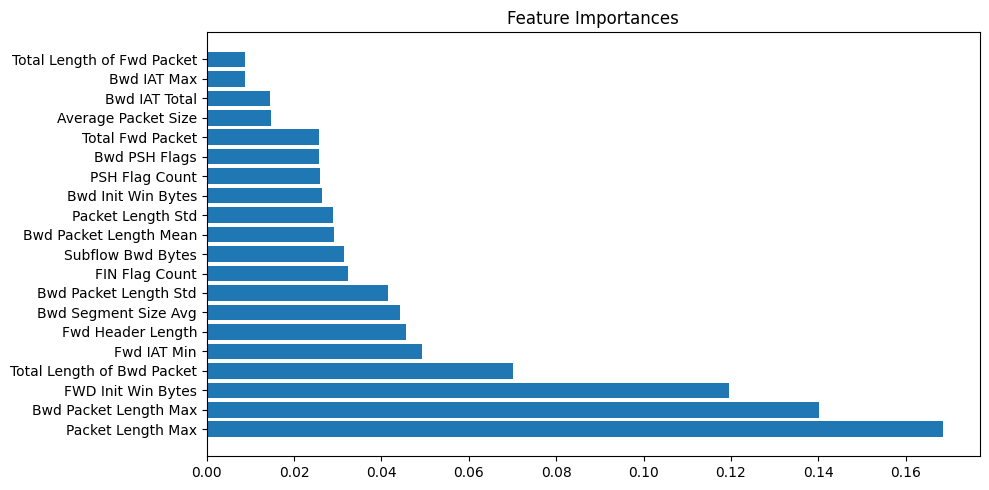

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_classifier.feature_importances_

# Get feature names
feature_names = features

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.barh(range(20), importances[indices[:20]])
plt.yticks(range(20), sorted_feature_names[:20])
plt.tight_layout()
plt.show()

2.2 Train the Model of DoS Attacks based on the features importance

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

usecols_features_importance = ["Total Length of Bwd Packet", "Bwd Init Win Bytes", "FWD Init Win Bytes", "Bwd Segment Size Avg", "Packet Length Max",
                               "FIN Flag Count", "Total Fwd Packet", "Fwd IAT Min", "Label"]

df_DoS_attacks = pd.read_csv('/content/DoS_attacks_balanced.csv', usecols=usecols_features_importance)

features = df_DoS_attacks.columns.drop(["Label"])

# Create the X dataset containing all the features and the relative target labels y
X = df_DoS_attacks[features]
y = df_DoS_attacks["Label"]

# Dataset split in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

rf_classifier = RandomForestClassifier(max_depth=16, n_estimators=20)

# Training
rf_classifier.fit(X_train, y_train)

# Make Prediction
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00
                precision    recall  f1-score   support

        BENIGN       1.00      1.00      1.00    366504
     DDoS-HOIC       1.00      1.00      1.00    216078
DDoS-LOIC-HTTP       1.00      1.00      1.00     57775
 DDoS-LOIC-UDP       1.00      1.00      1.00       505
 DoS GoldenEye       1.00      1.00      1.00      4425
      DoS Hulk       1.00      1.00      1.00    361507
 DoS Slowloris       1.00      1.00      1.00      1720

      accuracy                           1.00   1008514
     macro avg       1.00      1.00      1.00   1008514
  weighted avg       1.00      1.00      1.00   1008514

[[366504      0      0      0      0      0      0]
 [     0 216078      0      0      0      0      0]
 [     0      0  57775      0      0      0      0]
 [     0      0      0    505      0      0      0]
 [     0      0      0      0   4425      0      0]
 [     0      0      0      0      0 361507      0]
 [     0      0      0      0      0      0   1720]]


2.3 Export the Model as a PMMLPipeline to use it later on a Java Application

In [ ]:
%pip install sklearn2pmml

from sklearn2pmml import PMMLPipeline, sklearn2pmml

# Create a PMML pipeline
pipeline = PMMLPipeline([
    ("classifier", rf_classifier)
])

# Export the model to PMML format
sklearn2pmml(pipeline, "rf_DoS_classifier_v2.pmml", with_repr=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 40.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.0 MB/s eta 0:00:00
  Created wheel for sklearn2pmml: filename=sklearn2pmml-0.105.0-py3-none-any.whl size=7098890 sha256=5bbf94c7cca65662673c7aafe8eadf260cdfc41aae546df20905ce10660132e3
  Stored in directory: /root/.cache/pip/wheels/ce/2d/0e/ff130725efa03aacb7ce7003bfcb02bec226948b8c2ef0f5da
Successfully built sklearn2pmml


# 3. Analyse BruteForce data

In [ ]:
import pandas as pd

# Specify the path to your CSV files
df_BruteForce_attacks = pd.read_csv('/content/BruteForce_attacks_balanced.csv')
df_BruteForce_FTP_attacks = pd.read_csv('/content/FTPBruteForce_attacks_balanced.csv')

df_BruteForce_attacks = pd.concat([df_BruteForce_attacks, df_BruteForce_FTP_attacks])

# Print the different kind of DoS attacks present in the dataset
df_BruteForce_attacks['Label'].unique()

array(['BENIGN', 'SSH-BruteForce', 'Web Attack - SQL', 'Web Attack - XSS',
       'Web Attack - Brute Force', 'FTP-BruteForce'], dtype=object)

In [ ]:
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler

df_BruteForce_attacks = df_BruteForce_attacks.drop(['Attempted Category', 'id', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
                                                    'Timestamp', "Fwd RST Flags", "Bwd RST Flags", "ICMP Code", "ICMP Type" , "Total TCP Flow Time"], axis=1)

# Amount of data
print("BENIGN Flows: "           + str(len(df_BruteForce_attacks[df_BruteForce_attacks['Label'] == 'BENIGN'])))
print("SSH-BruteForce Attacks: " + str(len(df_BruteForce_attacks[df_BruteForce_attacks['Label'] == 'SSH-BruteForce'])))
print("FTP-BruteForce Attacks: " + str(len(df_BruteForce_attacks[df_BruteForce_attacks['Label'] == 'FTP-BruteForce'])))


# Make a single class DoS Attack out of the different type of BruteForce attacks
df_BruteForce_attacks.loc[df_BruteForce_attacks['Label'] == "SSH-BruteForce", 'Label'] = "BruteForce Attack"
df_BruteForce_attacks.loc[df_BruteForce_attacks['Label'] == "FTP-BruteForce", 'Label'] = "BruteForce Attack"

benign_attacks = df_BruteForce_attacks[df_BruteForce_attacks['Label'] == "BENIGN"]
bruteforce_attacks = df_BruteForce_attacks[df_BruteForce_attacks['Label'] == "BruteForce Attack"]

df_BruteForce_attacks = pd.concat([benign_attacks, bruteforce_attacks])

features = df_BruteForce_attacks.columns.drop(["Label"])

# Create the X dataset containing all the features and the relative target labels y
X = df_BruteForce_attacks[features]
y = df_BruteForce_attacks["Label"]

BENIGN Flows: 99116
SSH-BruteForce Attacks: 94197
FTP-BruteForce Attacks: 4950


3.1 Get Features Importance

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Dataset split in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

rf_classifier = RandomForestClassifier(max_depth=16, n_estimators=20)

# Training
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, n_estimators=20)

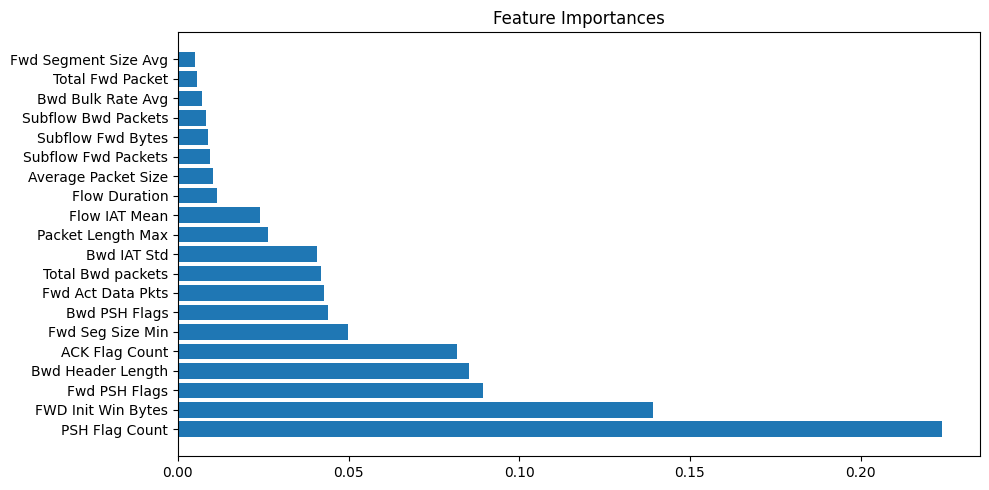

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf_classifier.feature_importances_

# Get feature names
feature_names = features

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.barh(range(20), importances[indices[:20]])
plt.yticks(range(20), sorted_feature_names[:20])
plt.tight_layout()
plt.show()

3.2 Train the Model of BruteForce Attacks based on the features importance

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

usecols_features_importance = [ "FWD Init Win Bytes", "Bwd PSH Flags", "Fwd Act Data Pkts", "Fwd PSH Flags", "Fwd Header Length", "Total Bwd packets",
                               "Fwd Seg Size Min", "Bwd Init Win Bytes", "Label"]

df_BruteForce_attacks = pd.read_csv('/content/BruteForce_attacks_balanced.csv', usecols = usecols_features_importance)
df_BruteForce_FTP_attacks = pd.read_csv('/content/FTPBruteForce_attacks_balanced.csv', usecols = usecols_features_importance)
df_BruteForce_attacks = pd.concat([df_BruteForce_attacks, df_BruteForce_FTP_attacks])

# Make a single class DoS Attack out of the different type of BruteForce attacks
df_BruteForce_attacks.loc[df_BruteForce_attacks['Label'] == "SSH-BruteForce", 'Label'] = "BruteForce Attack"
df_BruteForce_attacks.loc[df_BruteForce_attacks['Label'] == "FTP-BruteForce", 'Label'] = "BruteForce Attack"

benign_attacks = df_BruteForce_attacks[df_BruteForce_attacks['Label'] == "BENIGN"]
bruteforce_attacks = df_BruteForce_attacks[df_BruteForce_attacks['Label'] == "BruteForce Attack"]

df_BruteForce_attacks = pd.concat([benign_attacks, bruteforce_attacks])

features = df_BruteForce_attacks.columns.drop(["Label"])

# Create the X dataset containing all the features and the relative target labels y
X = df_BruteForce_attacks[features]
y = df_BruteForce_attacks["Label"]

# Dataset split in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

rf_classifier = RandomForestClassifier(max_depth=16, n_estimators=20)

# Training
rf_classifier.fit(X_train, y_train)

# Make Prediction
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00
                   precision    recall  f1-score   support

           BENIGN       1.00      1.00      1.00     19722
BruteForce Attack       1.00      1.00      1.00     19931

         accuracy                           1.00     39653
        macro avg       1.00      1.00      1.00     39653
     weighted avg       1.00      1.00      1.00     39653

[[19722     0]
 [    0 19931]]


3.3 Export the Model as a PMMLPipeline to use it later on a Java Application

In [ ]:
%pip install sklearn2pmml

from sklearn2pmml import PMMLPipeline, sklearn2pmml

# Create a PMML pipeline
pipeline = PMMLPipeline([
    ("classifier", rf_classifier)
])

# Export the model to PMML format
sklearn2pmml(pipeline, "rf_DoS_classifier_v2.pmml", with_repr=True)

# 4. Analyse PortScan (Infiltration) data

In [ ]:
import pandas as pd

# Specify the path to your CSV files
df_PortScan_attacks = pd.read_csv('/content/portscan_attacks_balanced.csv')

df_PortScan_attacks = df_PortScan_attacks.drop(['Attempted Category', 'id', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
                                                    'Timestamp', "Fwd RST Flags", "Bwd RST Flags", "ICMP Code", "ICMP Type" , "Total TCP Flow Time"], axis=1)

# Print the different kind of DoS attacks present in the dataset
df_PortScan_attacks['Label'].unique()

array(['Infiltration - NMAP Portscan', 'BENIGN'], dtype=object)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

features = df_PortScan_attacks.columns.drop(["Label"])

# Amount of data
print("BENIGN Flows: "           + str(len(df_PortScan_attacks[df_PortScan_attacks['Label'] == 'BENIGN'])))
print("PortScan Attacks: "       + str(len(df_PortScan_attacks[df_PortScan_attacks['Label'] == 'Infiltration - NMAP Portscan'])))

# Create the X dataset containing all the features and the relative target labels y
X = df_PortScan_attacks[features]
y = df_PortScan_attacks["Label"]

BENIGN Flows: 49740
PortScan Attacks: 49740


4.1 Get Features Importance

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Dataset split in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

rf_classifier = RandomForestClassifier(max_depth=16, n_estimators=20)

# Training
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, n_estimators=20)

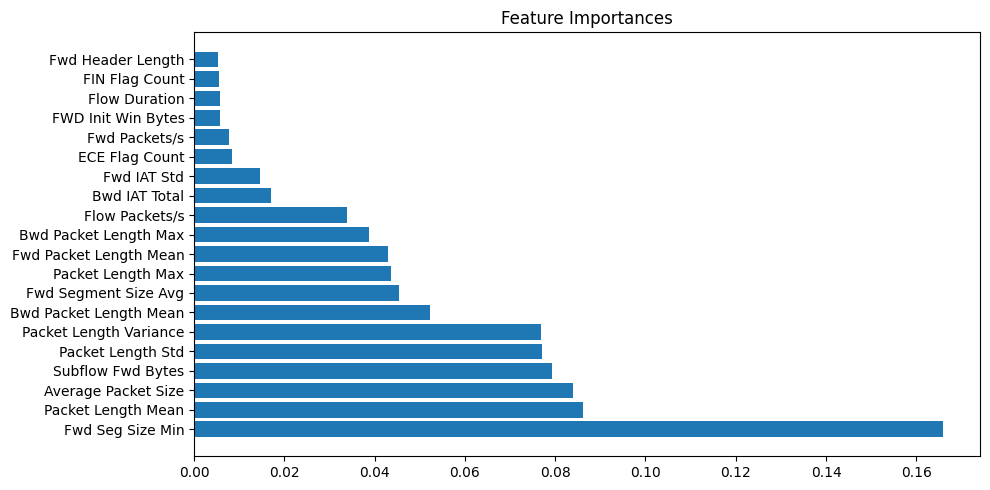

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf_classifier.feature_importances_

# Get feature names
feature_names = features

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.barh(range(20), importances[indices[:20]])
plt.yticks(range(20), sorted_feature_names[:20])
plt.tight_layout()
plt.show()

4.2 Train the Model of PortScan Attacks based on the features importance

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

usecols_features_importance = ["Fwd Packet Length Mean", "Fwd Packet Length Max", "Flow Bytes/s", "Packet Length Variance",
                         "Fwd Seg Size Min", "Subflow Fwd Bytes", "Label"]

usecols_features_importance = ["Subflow Bwd Bytes", "Average Packet Size", "Bwd Packet Length Mean", "FIN Flag Count",
                         "Flow IAT Mean", "Flow Packets/s", "Flow Bytes/s", "Bwd IAT Total", "Label"]

df_PortScan_attacks = pd.read_csv('/content/portscan_attacks_balanced.csv', usecols=usecols_features_importance)

features = df_PortScan_attacks.columns.drop(["Label"])

# Create the X dataset containing all the features and the relative target labels y
X = df_PortScan_attacks[features]
y = df_PortScan_attacks["Label"]

# Dataset split in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

rf_classifier = RandomForestClassifier(max_depth=16, n_estimators=20)

# Training
rf_classifier.fit(X_train, y_train)

# Make Prediction
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00
                              precision    recall  f1-score   support

                      BENIGN       1.00      0.99      1.00      9927
Infiltration - NMAP Portscan       0.99      1.00      1.00      9969

                    accuracy                           1.00     19896
                   macro avg       1.00      1.00      1.00     19896
                weighted avg       1.00      1.00      1.00     19896

[[9862   65]
 [  11 9958]]


# 5. Analyse Botnet data


In [ ]:
import pandas as pd

# Specify the path to your CSV files
df_BotNet_attacks = pd.read_csv('/content/botnet_attacks_balanced.csv')

df_BotNet_attacks = df_BotNet_attacks.drop(['Attempted Category', 'id', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
                                                    'Timestamp', "Fwd RST Flags", "Bwd RST Flags", "ICMP Code", "ICMP Type" , "Total TCP Flow Time"], axis=1)

# Print the different kind of DoS attacks present in the dataset
df_BotNet_attacks['Label'].unique()

array(['BENIGN', 'Botnet Ares'], dtype=object)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

features = df_BotNet_attacks.columns.drop(["Label"])
# Amount of data
print("BENIGN Flows: "         + str(len(df_BotNet_attacks[df_BotNet_attacks['Label'] == 'BENIGN'])))
print("Botnet Attacks: "       + str(len(df_BotNet_attacks[df_BotNet_attacks['Label'] == 'Botnet Ares'])))

# Create the X dataset containing all the features and the relative target labels y
X = df_BotNet_attacks[features]
y = df_BotNet_attacks["Label"]

BENIGN Flows: 142921
Botnet Attacks: 142921


5.1 Get Features Importance

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Dataset split in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

rf_classifier = RandomForestClassifier(max_depth=16, n_estimators=20)

# Training
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, n_estimators=20)

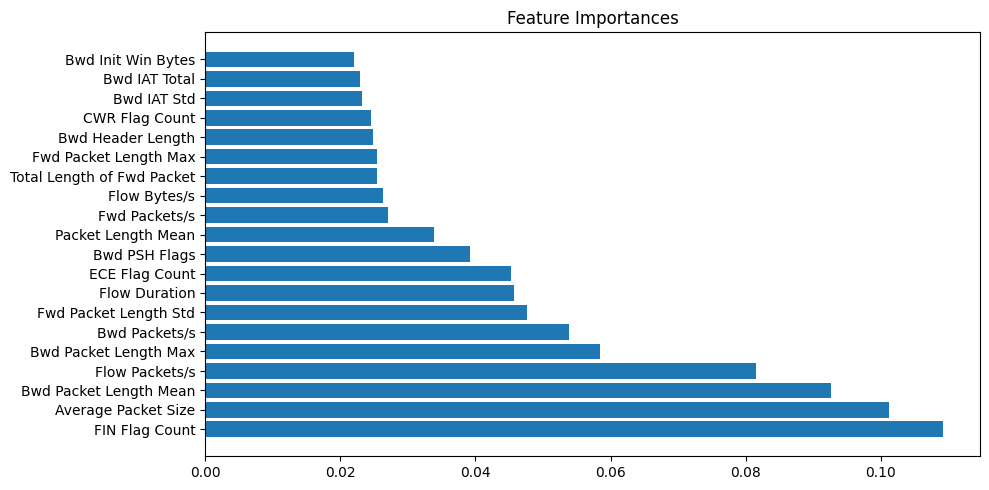

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf_classifier.feature_importances_

# Get feature names
feature_names = features

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.barh(range(20), importances[indices[:20]])
plt.yticks(range(20), sorted_feature_names[:20])
plt.tight_layout()
plt.show()


5.2 Train the Model of BotNet Attacks based on the features importance

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

usecols_features_importance = ["Bwd Packet Length Mean", "Subflow Bwd Bytes", "FIN Flag Count", "Bwd Packets/s", "Fwd Packets/s", "Flow Bytes/s",
                                "Flow IAT Max", "Packet Length Mean", "Label"]

df_BotNet_attacks = pd.read_csv('/content/botnet_attacks_balanced.csv', usecols=usecols_features_importance)

features = df_BotNet_attacks.columns.drop(["Label"])

# Create the X dataset containing all the features and the relative target labels y
X = df_BotNet_attacks[features]
y = df_BotNet_attacks["Label"]

# Dataset split in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

rf_classifier = RandomForestClassifier(max_depth=16, n_estimators=20)

# Training
rf_classifier.fit(X_train, y_train)

# Make Prediction
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     28623
 Botnet Ares       1.00      1.00      1.00     28546

    accuracy                           1.00     57169
   macro avg       1.00      1.00      1.00     57169
weighted avg       1.00      1.00      1.00     57169

[[28623     0]
 [    0 28546]]


# 6. Train ALL the attacks to create a single model

Import the analysed and balanced csv

In [ ]:
import pandas as pd

# Specify the path to your CSV files
df_DoS_attacks = pd.read_csv('/content/DoS_attacks_balanced.csv')
df_DoS_attacks = df_DoS_attacks.drop(['Attempted Category', 'id', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
              'Timestamp', "Fwd RST Flags", "Bwd RST Flags", "ICMP Code", "ICMP Type" , "Total TCP Flow Time"], axis=1)
df_BruteForce_attacks = pd.read_csv('/content/BruteForce_attacks_balanced.csv')
df_BruteForce_attacks = df_BruteForce_attacks.drop(['Attempted Category', 'id', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
              'Timestamp', "Fwd RST Flags", "Bwd RST Flags", "ICMP Code", "ICMP Type" , "Total TCP Flow Time"], axis=1)
df_BruteForce_FTP_attacks = pd.read_csv('/content/FTPBruteForce_attacks_balanced.csv')
df_BruteForce_FTP_attacks = df_BruteForce_FTP_attacks.drop(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
              'Timestamp'], axis=1)
df_BotNet_attacks = pd.read_csv('/content/botnet_attacks_balanced.csv')
df_BotNet_attacks = df_BotNet_attacks.drop(['Attempted Category', 'id', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
              'Timestamp', "Fwd RST Flags", "Bwd RST Flags", "ICMP Code", "ICMP Type" , "Total TCP Flow Time"], axis=1)
df_PortScan_attacks = pd.read_csv('/content/portscan_attacks_balanced.csv')
df_PortScan_attacks = df_PortScan_attacks.drop(['Attempted Category', 'id', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
              'Timestamp', "Fwd RST Flags", "Bwd RST Flags", "ICMP Code", "ICMP Type" , "Total TCP Flow Time"], axis=1)


Gather all the kinf of DoS attacks in a single class called "DoS Attack"

In [ ]:
df_DoS_attacks.loc[df_DoS_attacks['Label'] == "DoS Slowloris", 'Label'] = "DoS Attack"
df_DoS_attacks.loc[df_DoS_attacks['Label'] == "DoS Hulk", 'Label'] = "DoS Attack"
df_DoS_attacks.loc[df_DoS_attacks['Label'] == "DDoS-HOIC", 'Label'] = "DoS Attack"
df_DoS_attacks.loc[df_DoS_attacks['Label'] == "DDoS-LOIC-HTTP", 'Label'] = "DoS Attack"
df_DoS_attacks.loc[df_DoS_attacks['Label'] == "DDoS-LOIC-UDP", 'Label'] = "DoS Attack"
df_DoS_attacks.loc[df_DoS_attacks['Label'] == "DoS GoldenEye", 'Label'] = "DoS Attack"

Gather all the two kind bruteforce attacks in one single class called "BruteForce Attack"

In [ ]:
df_BruteForce_attacks = pd.concat([df_BruteForce_attacks, df_BruteForce_FTP_attacks])

# Make a single class DoS Attack out of the different type of BruteForce attacks
df_BruteForce_attacks.loc[df_BruteForce_attacks['Label'] == "SSH-BruteForce", 'Label'] = "BruteForce Attack"
df_BruteForce_attacks.loc[df_BruteForce_attacks['Label'] == "FTP-BruteForce", 'Label'] = "BruteForce Attack"

benign_attacks = df_BruteForce_attacks[df_BruteForce_attacks['Label'] == "BENIGN"]
bruteforce_attacks = df_BruteForce_attacks[df_BruteForce_attacks['Label'] == "BruteForce Attack"]

df_BruteForce_attacks = pd.concat([benign_attacks, bruteforce_attacks])

In [ ]:
df = pd.concat([df_DoS_attacks, df_BruteForce_attacks, df_BotNet_attacks, df_PortScan_attacks])

del(df_DoS_attacks, df_BruteForce_attacks, df_BotNet_attacks, df_PortScan_attacks) # Get rid of unsed variables to save RAM

df.dropna(inplace=True)
df['Label'].unique()

array(['BENIGN', 'DoS Attack', 'BruteForce Attack', 'Botnet Ares',
       'Infiltration - NMAP Portscan'], dtype=object)

In [ ]:
# Amount of data
cnt_benign = len(df[df['Label'] == 'BENIGN'])
cnt_DoS = len(df[df['Label'] == 'DoS Attack'])
cnt_BruteForce = len(df[df['Label'] == 'BruteForce Attack'])
cnt_PortScan = len(df[df['Label'] == 'Infiltration - NMAP Portscan'])
cnt_BotNet = len(df[df['Label'] == 'Botnet Ares'])

print("BENIGN Flows: "       + str(cnt_benign))
print("DoS        Attacks: " + str(cnt_DoS))
print("BruteForce Attacks: " + str(cnt_BruteForce))
print("PortScan   Attacks: " + str(cnt_PortScan))
print("BotNet     Attacks: " + str(cnt_BotNet))

print("TOTAL LENGTH OF DATA: " + str(sum([cnt_benign, cnt_DoS, cnt_BruteForce, cnt_PortScan, cnt_BotNet])))

BENIGN Flows: 2125986
DoS        Attacks: 3208358
BruteForce Attacks: 99147
PortScan   Attacks: 49740
BotNet     Attacks: 142921
TOTAL LENGTH OF DATA: 5626152


In [ ]:
# The amount of data of DoS attacks is way more the data of other attacks, trying to balance it in the following steps
benign = df[df['Label'] == 'BENIGN']
DoS = df[df['Label'] == 'DoS Attack']
bruteforce = df[df['Label'] == 'BruteForce Attack']
portscan = df[df['Label'] == 'Infiltration - NMAP Portscan']
botnet = df[df['Label'] == 'Botnet Ares']

# balancing amount to downsample the benign and DoS class
balancing = (cnt_BruteForce + cnt_PortScan + cnt_BotNet)//2

df = pd.concat([benign[:balancing], DoS[:balancing], bruteforce, portscan, botnet])

In [ ]:
# Balanced Amount of data
cnt_benign = len(df[df['Label'] == 'BENIGN'])
cnt_DoS = len(df[df['Label'] == 'DoS Attack'])
cnt_BruteForce = len(df[df['Label'] == 'BruteForce Attack'])
cnt_PortScan = len(df[df['Label'] == 'Infiltration - NMAP Portscan'])
cnt_BotNet = len(df[df['Label'] == 'Botnet Ares'])

print("BENIGN Flows: "       + str(cnt_benign))
print("DoS        Attacks: " + str(cnt_DoS))
print("BruteForce Attacks: " + str(cnt_BruteForce))
print("PortScan   Attacks: " + str(cnt_PortScan))
print("BotNet     Attacks: " + str(cnt_BotNet))

print("TOTAL LENGTH OF DATA: " + str(sum([cnt_benign, cnt_DoS, cnt_BruteForce, cnt_PortScan, cnt_BotNet])))

BENIGN Flows: 145904
DoS        Attacks: 145904
BruteForce Attacks: 99147
PortScan   Attacks: 49740
BotNet     Attacks: 142921
TOTAL LENGTH OF DATA: 583616


In [ ]:
features = df.columns.drop(["Label"])

# Create the X dataset containing all the features and the relative target labels y
X = df[features]
y = df["Label"]

6.1 Get Features Importance


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Dataset split in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

rf_classifier = RandomForestClassifier(max_depth=16, n_estimators=20)

# Training
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, n_estimators=20)

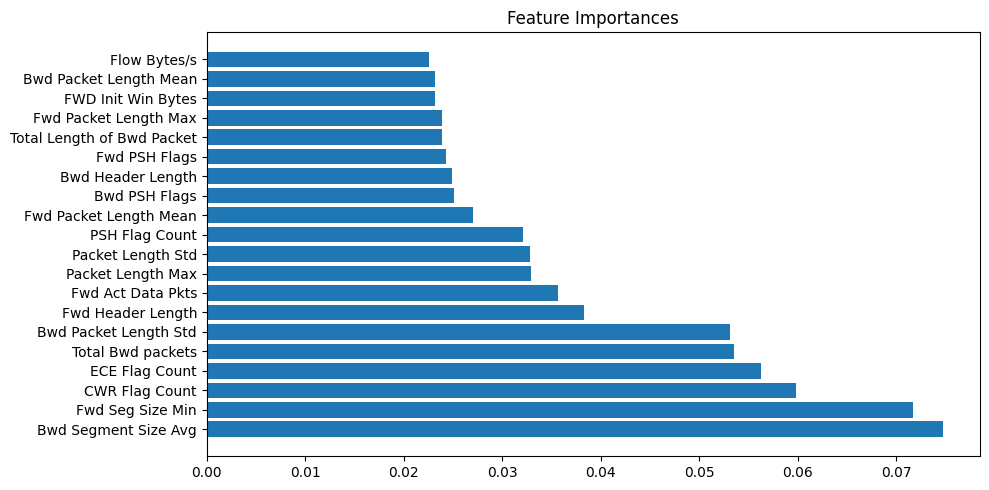

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf_classifier.feature_importances_

# Get feature names
feature_names = features

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.barh(range(20), importances[indices[:20]])
plt.yticks(range(20), sorted_feature_names[:20])
plt.tight_layout()
plt.show()

6.2  Train the Model of Cyber Attacks based on the features importance

In [ ]:
import pandas as pd

# The 13 most important features identified before (after some simulations these features were the best performing ones)

usecols_features_importance = ["FWD Init Win Bytes", "Packet Length Std", "Packet Length Mean", "Bwd Packet Length Std",
                               "Bwd Packet Length Max", "Bwd PSH Flags", "ACK Flag Count", "Fwd Seg Size Min", "Fwd PSH Flags",
                               "CWR Flag Count", "Packet Length Variance", "Fwd Packet Length Max", "Bwd Packet Length Mean", "Label"]

# Specify the path to your CSV files
df_DoS_attacks = pd.read_csv('/content/DoS_attacks_balanced.csv', usecols = usecols_features_importance)
df_BruteForce_attacks = pd.read_csv('/content/BruteForce_attacks_balanced.csv', usecols = usecols_features_importance)
df_BruteForce_FTP_attacks = pd.read_csv('/content/FTPBruteForce_attacks_balanced.csv', usecols = usecols_features_importance)
df_BotNet_attacks = pd.read_csv('/content/botnet_attacks_balanced.csv', usecols = usecols_features_importance)
df_PortScan_attacks = pd.read_csv('/content/portscan_attacks_balanced.csv', usecols = usecols_features_importance)

# Gather all the kind of DoS attacks in a single class called "DoS Attack"
df_DoS_attacks.loc[df_DoS_attacks['Label'] == "DoS Slowloris", 'Label'] = "DoS Attack"
df_DoS_attacks.loc[df_DoS_attacks['Label'] == "DoS Hulk", 'Label'] = "DoS Attack"
df_DoS_attacks.loc[df_DoS_attacks['Label'] == "DDoS-HOIC", 'Label'] = "DoS Attack"
df_DoS_attacks.loc[df_DoS_attacks['Label'] == "DDoS-LOIC-HTTP", 'Label'] = "DoS Attack"
df_DoS_attacks.loc[df_DoS_attacks['Label'] == "DDoS-LOIC-UDP", 'Label'] = "DoS Attack"
df_DoS_attacks.loc[df_DoS_attacks['Label'] == "DoS GoldenEye", 'Label'] = "DoS Attack"

df_BruteForce_attacks = pd.concat([df_BruteForce_attacks, df_BruteForce_FTP_attacks])

# Make a single class BruteForce Attack out of the different types of BruteForce attacks
df_BruteForce_attacks.loc[df_BruteForce_attacks['Label'] == "SSH-BruteForce", 'Label'] = "BruteForce Attack"
df_BruteForce_attacks.loc[df_BruteForce_attacks['Label'] == "FTP-BruteForce", 'Label'] = "BruteForce Attack"

benign_attacks = df_BruteForce_attacks[df_BruteForce_attacks['Label'] == "BENIGN"]
bruteforce_attacks = df_BruteForce_attacks[df_BruteForce_attacks['Label'] == "BruteForce Attack"]

df_BruteForce_attacks = pd.concat([benign_attacks, bruteforce_attacks])

df = pd.concat([df_DoS_attacks, df_BruteForce_attacks, df_BotNet_attacks, df_PortScan_attacks])

del(df_DoS_attacks, df_BruteForce_attacks, df_BotNet_attacks, df_PortScan_attacks) # Get rid of unsed variables to save RAM

df.dropna(inplace=True)
df['Label'].unique()

array(['BENIGN', 'DoS Attack', 'BruteForce Attack', 'Botnet Ares',
       'Infiltration - NMAP Portscan'], dtype=object)

In [ ]:
# Amount of data
cnt_benign = len(df[df['Label'] == 'BENIGN'])
cnt_DoS = len(df[df['Label'] == 'DoS Attack'])
cnt_BruteForce = len(df[df['Label'] == 'BruteForce Attack'])
cnt_PortScan = len(df[df['Label'] == 'Infiltration - NMAP Portscan'])
cnt_BotNet = len(df[df['Label'] == 'Botnet Ares'])

print("BENIGN Flows: "       + str(cnt_benign))
print("DoS        Attacks: " + str(cnt_DoS))
print("BruteForce Attacks: " + str(cnt_BruteForce))
print("PortScan   Attacks: " + str(cnt_PortScan))
print("BotNet     Attacks: " + str(cnt_BotNet))

print("TOTAL LENGTH OF DATA: " + str(sum([cnt_benign, cnt_DoS, cnt_BruteForce, cnt_PortScan, cnt_BotNet])))

BENIGN Flows: 2125986
DoS        Attacks: 3208358
BruteForce Attacks: 99147
PortScan   Attacks: 49740
BotNet     Attacks: 142921
TOTAL LENGTH OF DATA: 5626152


In [ ]:
# The amount of data of DoS attacks is way more the data of other attacks, trying to balance it in the following steps
benign = df[df['Label'] == 'BENIGN']
DoS = df[df['Label'] == 'DoS Attack']
bruteforce = df[df['Label'] == 'BruteForce Attack']
portscan = df[df['Label'] == 'Infiltration - NMAP Portscan']
botnet = df[df['Label'] == 'Botnet Ares']

# balancing amount to downsample the benign and DoS class
balancing = (cnt_BruteForce + cnt_PortScan + cnt_BotNet)//2

df = pd.concat([benign[:balancing], DoS[:balancing], bruteforce, portscan, botnet])

In [ ]:
# Balanced Amount of data
cnt_benign = len(df[df['Label'] == 'BENIGN'])
cnt_DoS = len(df[df['Label'] == 'DoS Attack'])
cnt_BruteForce = len(df[df['Label'] == 'BruteForce Attack'])
cnt_PortScan = len(df[df['Label'] == 'Infiltration - NMAP Portscan'])
cnt_BotNet = len(df[df['Label'] == 'Botnet Ares'])

print("BENIGN Flows: "       + str(cnt_benign))
print("DoS        Attacks: " + str(cnt_DoS))
print("BruteForce Attacks: " + str(cnt_BruteForce))
print("PortScan   Attacks: " + str(cnt_PortScan))
print("BotNet     Attacks: " + str(cnt_BotNet))

print("TOTAL LENGTH OF DATA: " + str(sum([cnt_benign, cnt_DoS, cnt_BruteForce, cnt_PortScan, cnt_BotNet])))

BENIGN Flows: 145904
DoS        Attacks: 145904
BruteForce Attacks: 99147
PortScan   Attacks: 49740
BotNet     Attacks: 142921
TOTAL LENGTH OF DATA: 583616


In [ ]:
features = df.columns.drop(["Label"])

# Create the X dataset containing all the features and the relative target labels y
X = df[features]
y = df["Label"]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Dataset split in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

rf_classifier = RandomForestClassifier(max_depth=16, n_estimators=20)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

# Training
rf_classifier.fit(X_train, y_train)

# Make Prediction
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)


Cross-validation scores: [0.99933604 0.99936817 0.9992932  0.9993039  0.99936816]
Mean CV score: 0.9993338929850598
Accuracy: 1.00
                              precision    recall  f1-score   support

                      BENIGN       1.00      1.00      1.00     28965
                 Botnet Ares       1.00      1.00      1.00     28527
           BruteForce Attack       1.00      1.00      1.00     19888
                  DoS Attack       1.00      1.00      1.00     29302
Infiltration - NMAP Portscan       0.99      1.00      1.00     10042

                    accuracy                           1.00    116724
                   macro avg       1.00      1.00      1.00    116724
                weighted avg       1.00      1.00      1.00    116724



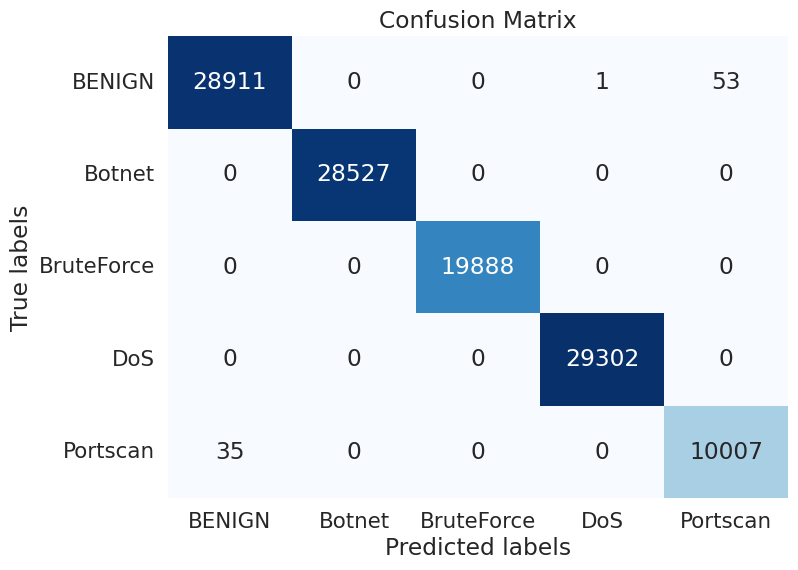

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Adjust to fit your needs
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['BENIGN', 'Botnet', 'BruteForce', 'DoS', 'Portscan'], yticklabels=['BENIGN', 'Botnet', 'BruteForce', 'DoS', 'Portscan'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

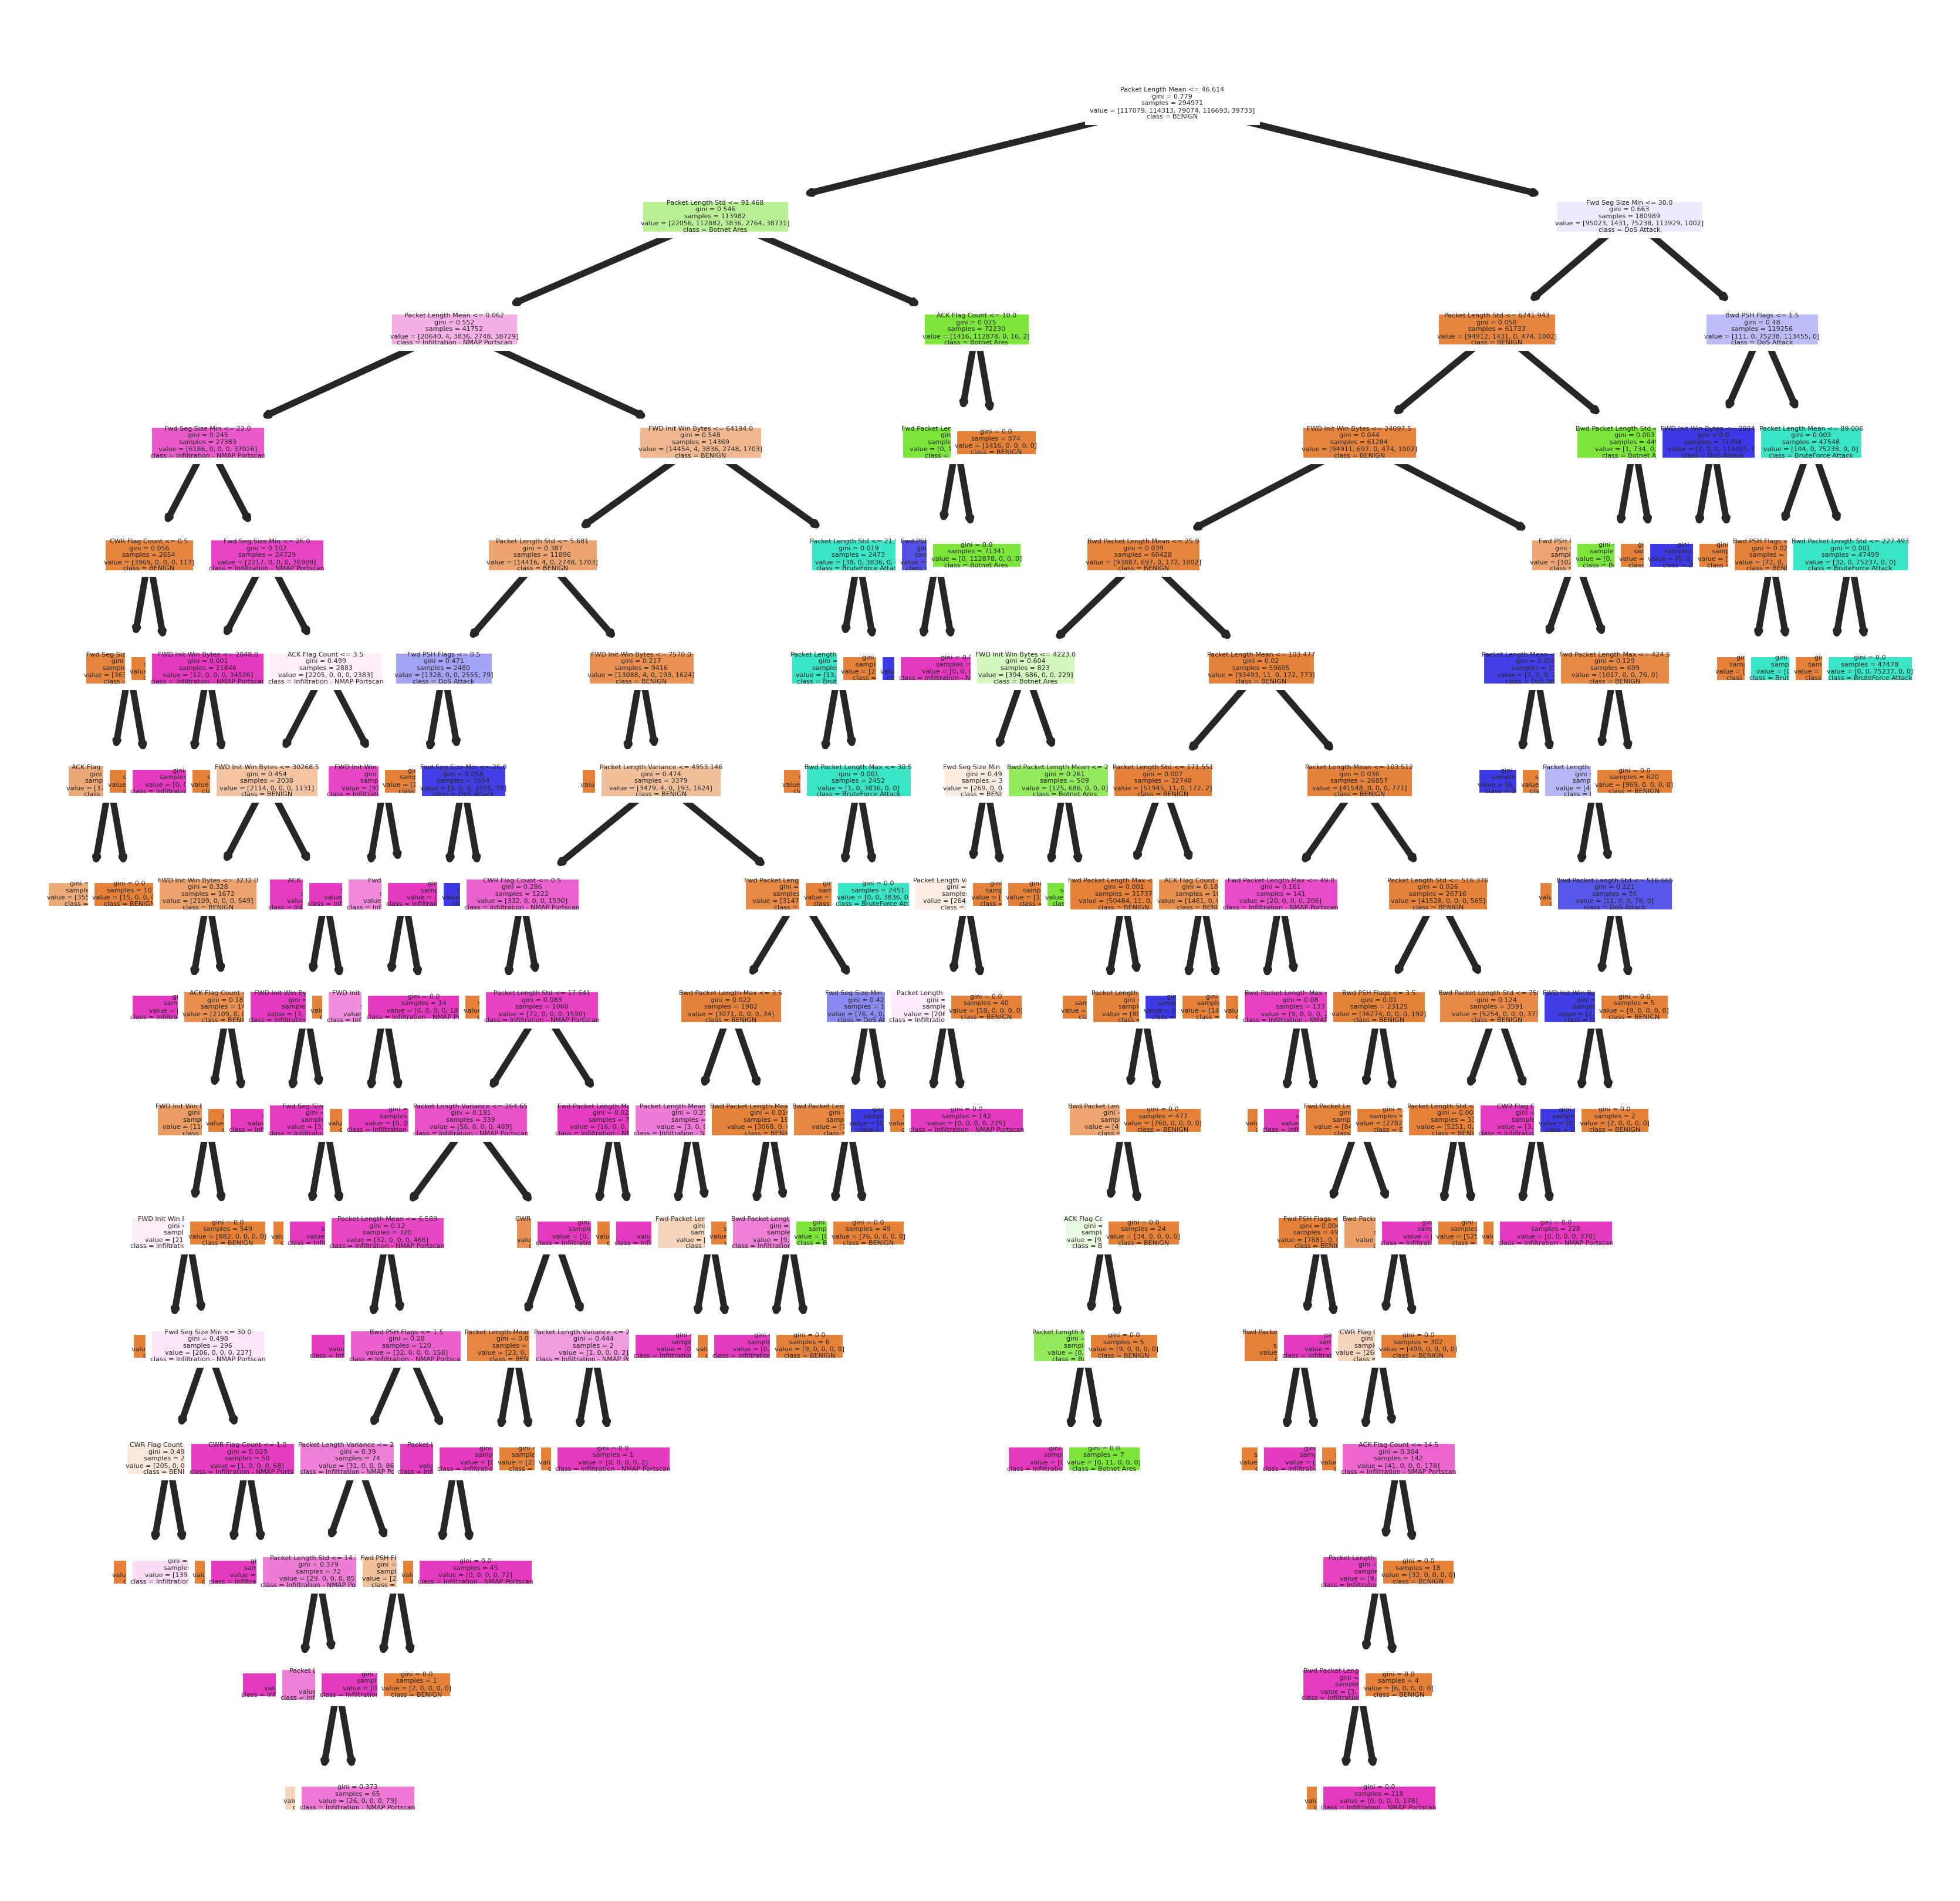

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd

fn = features
cn = ["BENIGN", "Botnet Ares", "BruteForce Attack", "DoS Attack", "Infiltration - NMAP Portscan"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=800)
tree.plot_tree(rf_classifier.estimators_[0],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

In [ ]:
%pip install sklearn2pmml

from sklearn2pmml import PMMLPipeline, sklearn2pmml

# Create a PMML pipeline
pipeline = PMMLPipeline([
    ("classifier", rf_classifier)
])

# Export the model to PMML format
sklearn2pmml(pipeline, "rf_ALL_attacks.pmml", with_repr=True)

6.3 Use Neural Network models

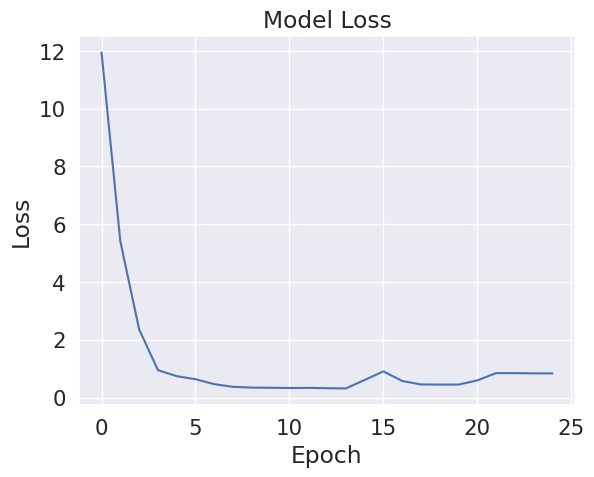

                              precision    recall  f1-score   support

                      BENIGN       0.94      0.82      0.87     28965
                 Botnet Ares       0.98      0.99      0.99     28527
           BruteForce Attack       0.98      1.00      0.99     19888
                  DoS Attack       0.87      0.98      0.92     29302
Infiltration - NMAP Portscan       0.96      0.87      0.91     10042

                    accuracy                           0.94    116724
                   macro avg       0.94      0.93      0.94    116724
                weighted avg       0.94      0.94      0.94    116724



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt

# Create an MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(1, 14), activation="relu", early_stopping=True, random_state=42, warm_start=True)
mlp.fit(X_train, y_train)

# Plot loss curve
plt.plot(mlp.loss_curve_)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Predict on test set
y_pred = mlp.predict(X_test)

# Display classification report
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

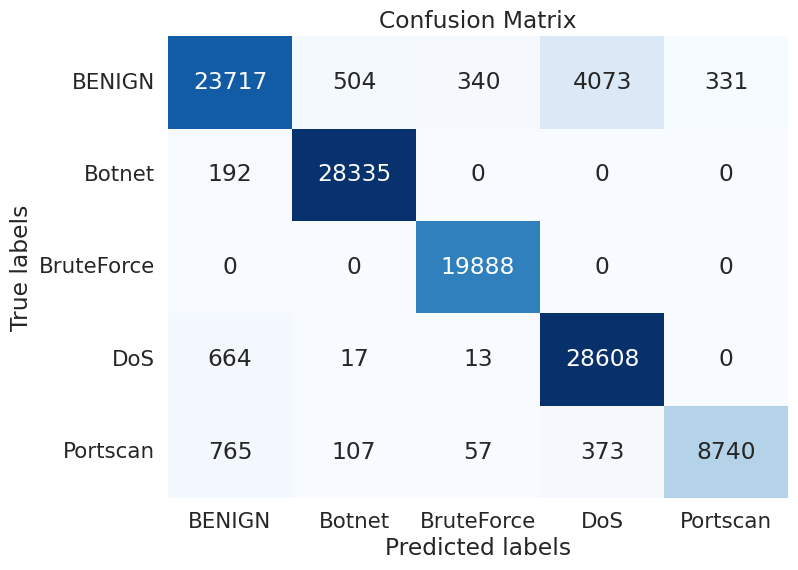

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Adjust to fit your needs
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['BENIGN', 'Botnet', 'BruteForce', 'DoS', 'Portscan'], yticklabels=['BENIGN', 'Botnet', 'BruteForce', 'DoS', 'Portscan'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()